# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aditya Nur'ahya
- **Email:** aditya.nurahya17@gmail.com
- **ID Dicoding:** adityanurahya

## Menentukan Pertanyaan Bisnis

## Business Understanding

### Latar Belakang
Dataset Brazilian E-Commerce digunakan untuk menganalisis perilaku pelanggan, performa penjualan, distribusi geografis, serta segmentasi pelanggan berdasarkan aktivitas transaksi.

### Pertanyaan Bisnis
1. Bagaimana tren penjualan dari waktu ke waktu?
2. Wilayah mana yang memiliki jumlah pelanggan dan transaksi tertinggi?

### Tujuan Analisis
- Mengidentifikasi pola transaksi pelanggan
- Mengetahui distribusi pelanggan secara geografis
- Mengelompokkan pelanggan berdasarkan perilaku pembelian


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("./data/customers_dataset.csv")
orders = pd.read_csv("./data/orders_dataset.csv")
order_items = pd.read_csv("./data/order_items_dataset.csv")
products = pd.read_csv("./data/products_dataset.csv")
payments = pd.read_csv("./data/order_payments_dataset.csv")
geolocation = pd.read_csv("./data/geolocation_dataset.csv")

df = orders.merge(customers, on="customer_id", how="left")
df = df.merge(order_items, on="order_id", how="left")
df = df.merge(products, on="product_id", how="left")
df = df.merge(payments, on="order_id", how="left")

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


**Insight:**
- Dataset berhasil digabungkan menjadi satu tabel utama yang berisi informasi pelanggan, produk, transaksi, dan pembayaran.

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118258 non-null  object        
 5   order_delivered_carrier_date   116360 non-null  object        
 6   order_delivered_customer_date  115037 non-null  object        
 7   order_estimated_delivery_date  118434 non-null  object        
 8   customer_unique_id             118434 non-null  object        
 9   customer_zip_code_prefix       118434 non-null  int64         
 10  customer_city                  118434 non-null  object        
 11  

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12


In [5]:
# Missing Value
df.isna().sum().sort_values(ascending=False)

order_delivered_customer_date    3397
product_photos_qty               2528
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
order_delivered_carrier_date     2074
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
product_id                        830
order_item_id                     830
shipping_limit_date               830
seller_id                         830
price                             830
freight_value                     830
order_approved_at                 176
payment_sequential                  3
payment_installments                3
payment_type                        3
payment_value                       3
customer_city                       0
customer_id                         0
customer_state                      0
customer_unique_id                  0
customer_zip_code_prefix            0
order_estima

In [6]:
# Duplicated Data
df.duplicated().sum()

np.int64(0)

In [7]:
# Statistik Deskriptif
df.describe()

,order_purchase_timestamp,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,118434,118434.000000,117604.000000,117604.000000,117604.000000,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,118431.000000,118431.000000,118431.000000
mean,2017-12-30 04:00:24.559636480,35034.264392,1.195920,120.822849,20.045551,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,1.094207,2.937398,172.849395
min,2016-09-04 21:15:19,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,1.000000,0.000000,0.000000
25%,2017-09-11 12:53:55.249999872,11310.000000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,1.000000,1.000000,60.860000
50%,2018-01-17 17:57:56.500000,24240.000000,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,1.000000,2.000000,108.200000
75%,2018-05-03 19:05:01,58464.500000,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,1.000000,4.000000,189.245000
max,2018-10-17 17:30:18,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,29.000000,24.000000,13664.080000
std,NaN,29819.290218,0.697721,184.477367,15.861351,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372,0.728290,2.774164,268.259831


**Insight:**

- Terdapat missing values pada beberapa kolom seperti product_category_name.
- Tidak ditemukan duplikasi signifikan pada data utama.
- Kolom timestamp sudah dalam format datetime.
- Beberapa kolom numerik memiliki rentang nilai yang cukup besar.


### Cleaning Data

In [8]:
# Drop Unrelevant Value
df = df.dropna(subset=['customer_unique_id'])

In [9]:
# Filling Missing Category
df['product_category_name'] = df['product_category_name'].fillna("unknown")

In [10]:
# Drop Duplicate Data
df = df.drop_duplicates()

In [11]:
# Drop Transaction Without payment
df = df[df['payment_value'] > 0]

In [12]:
# Handling Outlier
Q1 = df['payment_value'].quantile(0.25)
Q3 = df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['payment_value'] >= Q1 - 1.5*IQR) &
        (df['payment_value'] <= Q3 + 1.5*IQR)]


**Insight:**
Proses cleansing dilakukan untuk:

- Menghapus data tidak valid
- Menangani missing value
- Menghilangkan duplikasi
- Menghapus transaksi anomali

Setelah proses ini, dataset menjadi lebih bersih dan siap untuk dianalisis lebih lanjut.


## Exploratory Data Analysis (EDA)

### Explore ...

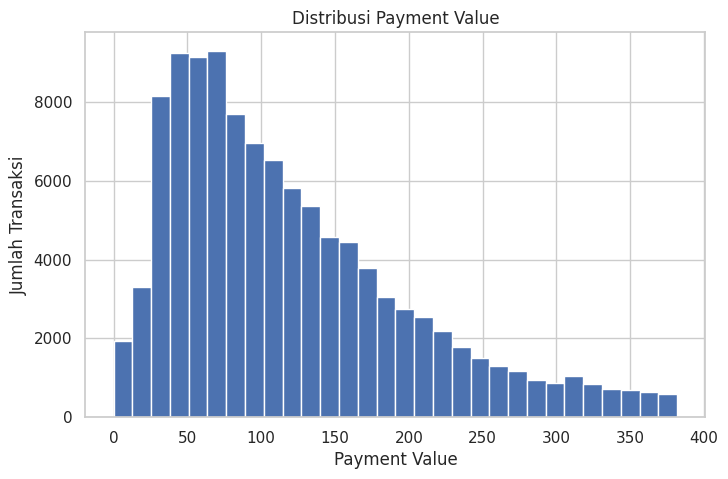

In [13]:
#  Distribusi Nilai Transaksi
plt.figure(figsize=(8,5))
df['payment_value'].hist(bins=30)
plt.title("Distribusi Payment Value")
plt.xlabel("Payment Value")
plt.ylabel("Jumlah Transaksi")
plt.show()

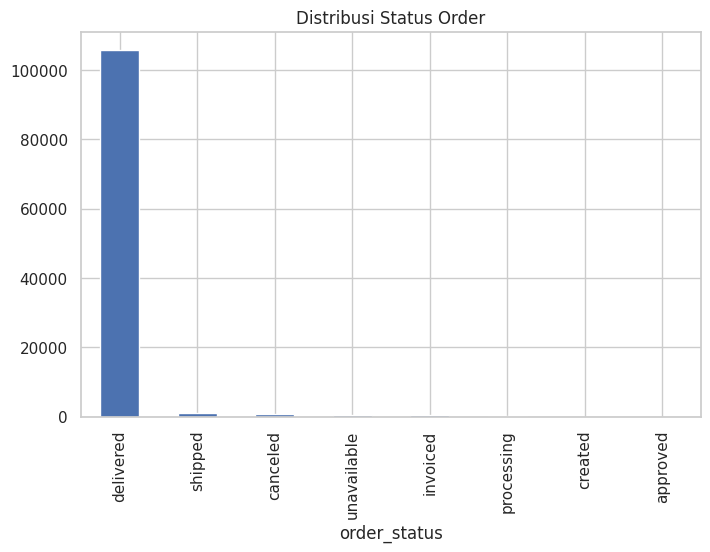

In [14]:
# Distribusi Status Order
plt.figure(figsize=(8,5))
df['order_status'].value_counts().plot(kind='bar')
plt.title("Distribusi Status Order")
plt.show()


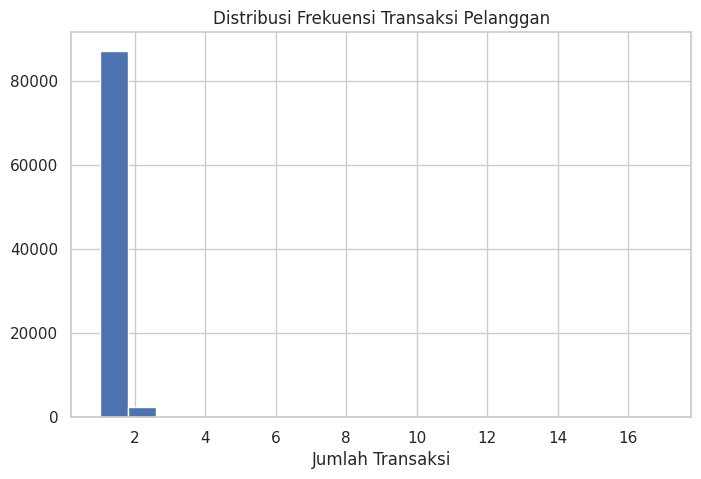

In [15]:
# Distribusi Frekuensi Transaksi per Pelanggan
freq_customer = df.groupby('customer_unique_id')['order_id'].nunique()

plt.figure(figsize=(8,5))
freq_customer.hist(bins=20)
plt.title("Distribusi Frekuensi Transaksi Pelanggan")
plt.xlabel("Jumlah Transaksi")
plt.show()


**Insight:**
- Distribusi nilai transaksi cenderung right-skewed, di mana sebagian besar transaksi bernilai kecil dan hanya sedikit transaksi bernilai besar.
- Sebagian besar order berada pada status delivered, menunjukkan performa fulfillment yang baik.
- Mayoritas pelanggan hanya melakukan 1 transaksi, menunjukkan peluang untuk meningkatkan repeat purchase.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dari waktu ke waktu?

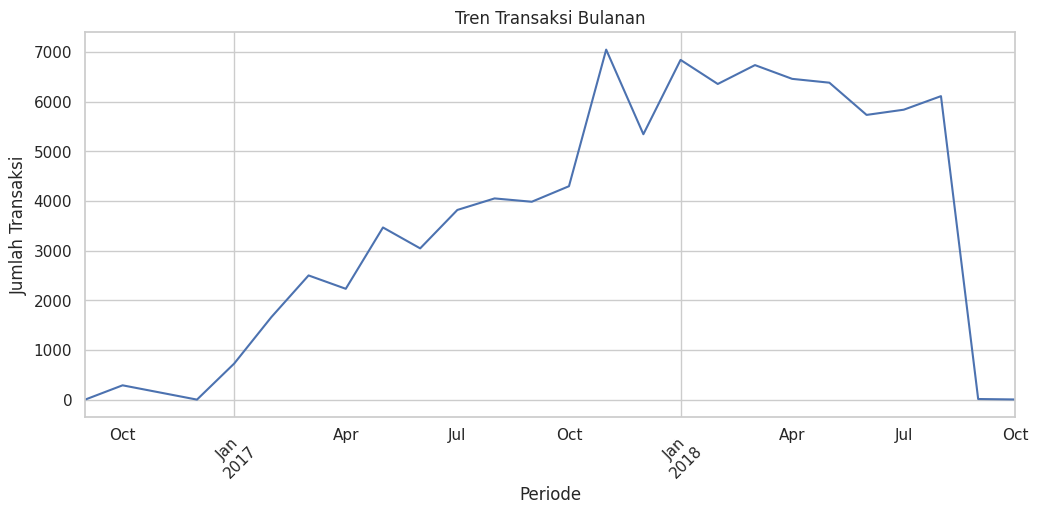

In [16]:
sales_trend = df.groupby(
    df['order_purchase_timestamp'].dt.to_period('M')
)['order_id'].nunique()

plt.figure(figsize=(12,5))
sales_trend.plot()
plt.title("Tren Transaksi Bulanan")
plt.xlabel("Periode")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

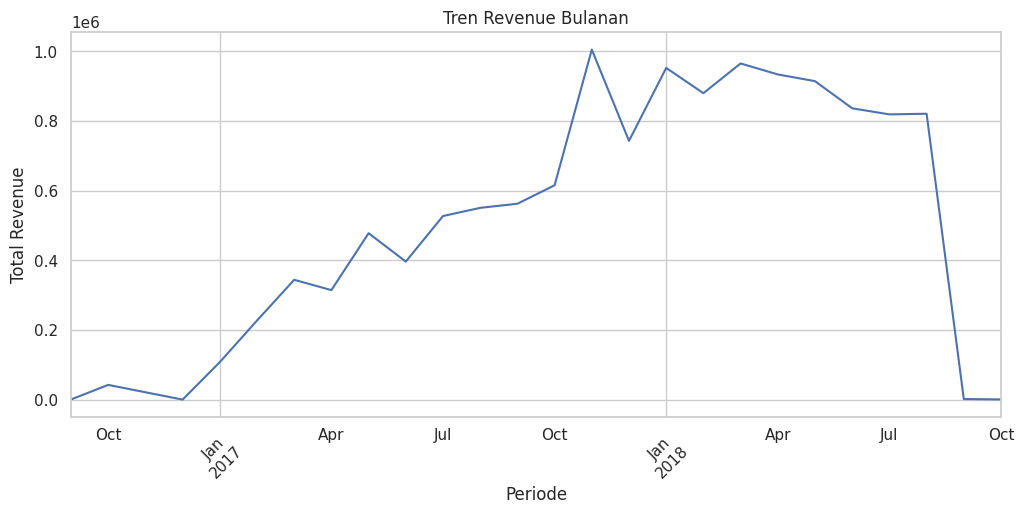

In [17]:
revenue_trend = df.groupby(
    df['order_purchase_timestamp'].dt.to_period('M')
)['payment_value'].sum()

plt.figure(figsize=(12,5))
revenue_trend.plot()
plt.title("Tren Revenue Bulanan")
plt.xlabel("Periode")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Wilayah mana yang memiliki jumlah pelanggan dan transaksi tertinggi?

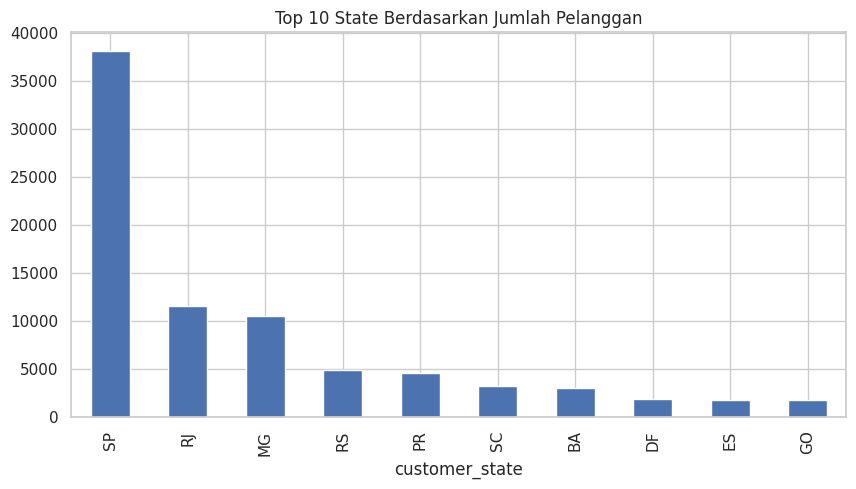

In [18]:
top_state_customer = df.groupby('customer_state')['customer_unique_id'] \
                        .nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_state_customer.plot(kind='bar')
plt.title("Top 10 State Berdasarkan Jumlah Pelanggan")
plt.show()


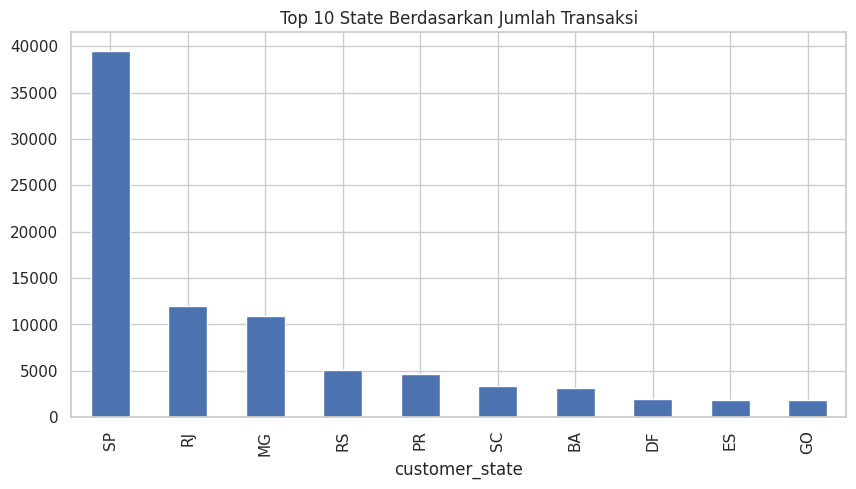

In [19]:
top_state_transaction = df.groupby('customer_state')['order_id'] \
                           .nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_state_transaction.plot(kind='bar')
plt.title("Top 10 State Berdasarkan Jumlah Transaksi")
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [20]:
snapshot_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_id','Recency','Frequency','Monetary']

rfm.head()

,customer_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [21]:
# RFM Scoring (Binning)
rfm['R'] = pd.qcut(rfm['Recency'],4,labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'),4,labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4]).astype(int)

rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']


In [22]:
# Manual Clustering
def segment(score):
    if score >= 10:
        return "Champions"
    elif score >= 8:
        return "Loyal"
    elif score >= 6:
        return "Potential"
    else:
        return "At Risk"

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

rfm['Segment'].value_counts()


Segment
Potential    30749
Loyal        30011
Champions    14636
At Risk      14526
Name: count, dtype: int64

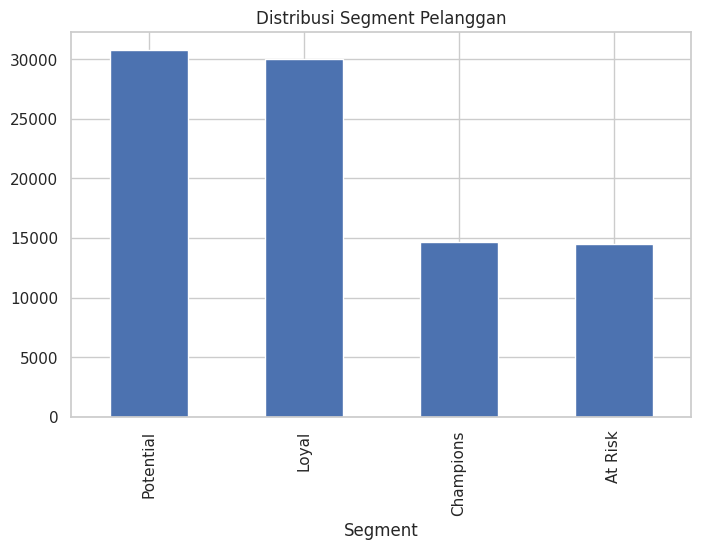

In [23]:
# Visualisasi Segmentasi
plt.figure(figsize=(8,5))
rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Distribusi Segment Pelanggan")
plt.show()


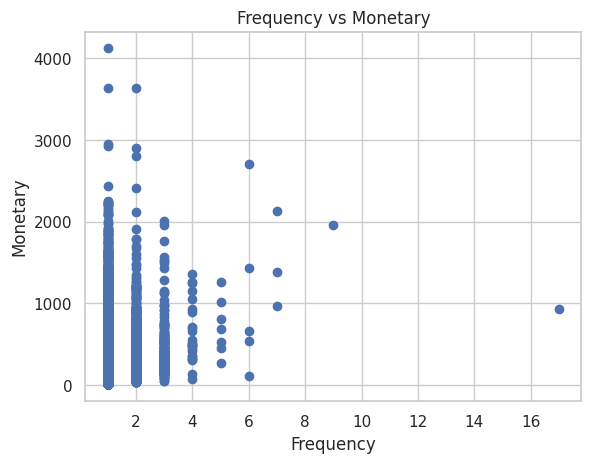

In [24]:
plt.figure()
plt.scatter(rfm["Frequency"], rfm["Monetary"])
plt.title("Frequency vs Monetary")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()


### Clustering

In [25]:
df['price_group'] = pd.cut(
    df['price'],
    bins=[0,50,200,500,10000],
    labels=['Low','Medium','High','Premium']
)

df['price_group'].value_counts()


price_group
Medium     59603
Low        40893
High        7452
Premium      152
Name: count, dtype: int64

### Geospatial Analysis

In [26]:
geo = geolocation.groupby('geolocation_zip_code_prefix').first().reset_index()

map_df = customers.merge(
    geo,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

map_df = map_df.dropna(subset=['geolocation_lat','geolocation_lng'])


In [27]:
m = folium.Map(location=[-15,-55], zoom_start=4)

for _,row in map_df.sample(1000).iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'],row['geolocation_lng']],
        radius=2
    ).add_to(m)

m


**Insight**:
- Distribusi pelanggan terkonsentrasi pada wilayah urban dan metropolitan.


## Conclusion

# 1️⃣ Tren Penjualan dari Waktu ke Waktu

Analisis menunjukkan bahwa jumlah transaksi dan total revenue mengalami fluktuasi dan memiliki kecenderungan meningkat pada periode tertentu, yang jadi indikasi adanya pola musiman dalam aktivitas penjualan. Monetisasi yang sehat terlihat dari kenaikan volume transaksi yang berbanding lurus dengan peningkatan revenue.

Implikasi bisnis:
Perusahaan dapat memanfaatkan pola musiman ini untuk mengoptimalkan strategi promosi, perencanaan stok, dan kampanye pemasaran pada periode dengan potensi permintaan tinggi.

---

## 2️⃣ Wilayah dengan Pelanggan dan Transaksi Tertinggi

Hasil analisis memperlihatkan bahwa aktivitas e-commerce memiliki konsentrasi tinggi di wilayah perkotaan atau metropolitan, dengan jumlah pelanggan dan transaksi paling tinggi berasal dari area urban. Wilayah dengan basis pelanggan besar konsisten menghasilkan volume transaksi yang lebih tinggi dibandingkan wilayah dengan basis yang tidak besar.

Implikasi bisnis:
Strategi ekspansi dapat difokuskan pada optimalisasi penetrasi pasar di kota besar sekaligus mengidentifikasi peluang pertumbuhan di wilayah dengan penetrasi yang masih rendah.


In [28]:
# Menyimpan data untuk dashboard
df.to_csv("main_data.csv", index=False)